# ¿Cuál es la mejor tarifa?

 La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vamos a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. 

## Inicialización

In [ ]:
import pandas as pd 
from scipy import stats as st 
from matplotlib import pyplot as plt 





## Cargar datos

In [ ]:
data_calls= pd.read_csv('/datasets/megaline_calls.csv')
data_internet=pd.read_csv('/datasets/megaline_internet.csv')
data_messages=pd.read_csv('/datasets/megaline_messages.csv')
data_plans=pd.read_csv('/datasets/megaline_plans.csv')
data_users=pd.read_csv('/datasets/megaline_users.csv')



## Preparar los datos

## Tarifas

In [ ]:
print(data_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [ ]:
print(data_plans.head(2))



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Usuarios/as

In [ ]:
data_users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
print(data_users.sample(5))

     user_id first_name last_name  age  \
462     1462     Lesley   Workman   20   
8       1008      Emely   Hoffman   53   
411     1411        Man   Fleming   64   
476     1476    Tammara    Dorsey   24   
121     1121  Kathaleen    Albert   34   

                                              city    reg_date      plan  \
462           Las Vegas-Henderson-Paradise, NV MSA  2018-09-05  ultimate   
8                Orlando-Kissimmee-Sanford, FL MSA  2018-08-03  ultimate   
411                              Rochester, NY MSA  2018-08-10      surf   
476         Los Angeles-Long Beach-Anaheim, CA MSA  2018-06-10  ultimate   
121  Miami-Fort Lauderdale-West Palm Beach, FL MSA  2018-03-13      surf   

    churn_date  
462        NaN  
8          NaN  
411        NaN  
476        NaN  
121        NaN  


### Corregir los datos

In [ ]:
data_users['churn_date']=data_users['churn_date'].fillna('Actual')
print(data_users['churn_date'].sample(5))

419    Actual
360    Actual
166    Actual
65     Actual
387    Actual
Name: churn_date, dtype: object


### Enriquecer los datos

In [ ]:
data_users['reg_date']=pd.to_datetime(data_users['reg_date'],format='%Y-%m-%d')

print(data_users.head(2))

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate     Actual  
1 2018-08-13      surf     Actual  


Comentario: Se transforma el registro de datos a un datatime, para una mejor comprension y visualizacion.

## Llamadas

In [ ]:
data_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
print(data_calls.head(10)) 


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40


Observaciones: No se evidencian datos ausentes, se cambio el formato de fecha de call_date para extraer la informacion del mes al que corresponde y de acuerdo a las indicaciones se redondea la duracion.

### Corregir los datos

In [ ]:
data_calls['call_date']=pd.to_datetime(data_calls['call_date'],format='%Y-%m-%d')
data_calls['duration_redondeada']= data_calls['duration'].apply(lambda  x:math.ceil(x))
print(data_calls.head(20))


          id  user_id  call_date  duration  duration_redondeada
0    1000_93     1000 2018-12-27      8.52                    9
1   1000_145     1000 2018-12-27     13.66                   14
2   1000_247     1000 2018-12-27     14.48                   15
3   1000_309     1000 2018-12-28      5.76                    6
4   1000_380     1000 2018-12-30      4.22                    5
5   1000_388     1000 2018-12-31      2.20                    3
6   1000_510     1000 2018-12-27      5.75                    6
7   1000_521     1000 2018-12-28     14.18                   15
8   1000_530     1000 2018-12-28      5.77                    6
9   1000_544     1000 2018-12-26      4.40                    5
10  1000_693     1000 2018-12-31      4.31                    5
11  1000_705     1000 2018-12-31     12.78                   13
12  1000_735     1000 2018-12-29      1.70                    2
13  1000_778     1000 2018-12-28      3.29                    4
14  1000_826     1000 2018-12-26      9.

### Enriquecer los datos

In [ ]:
data_calls['month']=data_calls['call_date'].dt.month
data_calls['duration']=data_calls.drop(data_calls[data_calls['duration']==0].index)
print(data_calls.head(5))

         id  user_id  call_date  duration  duration_redondeada  month
0   1000_93     1000 2018-12-27   1000_93                    9     12
1  1000_145     1000 2018-12-27  1000_145                   14     12
2  1000_247     1000 2018-12-27  1000_247                   15     12
3  1000_309     1000 2018-12-28  1000_309                    6     12
4  1000_380     1000 2018-12-30  1000_380                    5     12


Comentarios: Podriamos decir que son datos atipicos, podrian ser llamadas a contactos equivocados o personas que no contestaron las llamadas, sin embargo teniendo en cuenta que no tienen ningun efecto en el analisis, se procedera a eliminarlas de la data.

## Mensajes

In [ ]:
data_messages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
print(data_messages.sample(5))



             id  user_id message_date
39079  1254_989     1254   2018-09-17
42273  1273_390     1273   2018-11-03
47081  1320_325     1320   2018-12-20
28402  1174_192     1174   2018-09-13
17455  1114_387     1114   2018-10-29


Comentarios: No se ven datos ausentes, y se extrae el mes de tal forma que se pueda validar el cobro.

### Corregir los datos

In [ ]:
data_messages['message_date']=pd.to_datetime(data_messages['message_date'],format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
data_messages['month']=data_messages['message_date'].dt.month
print(data_messages.head(5))



         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Internet

In [ ]:
data_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
print(data_internet.head(10))

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


Observaciones: Se evidencian que todas las variables tienen el mismo numero de entradas lo que nos indica que no hay datos ausentes.

### Corregir los datos

In [ ]:
data_internet['session_date']=pd.to_datetime(data_internet['session_date'],format='%Y-%m-%d')

### Enriquecer los datos

In [ ]:
data_internet['month']=data_internet['session_date'].dt.month
data_internet['redondeo_gb']=(data_internet['mb_used'])/1024
data_internet['redondeo_gb']=round(data_internet['redondeo_gb'])
print(data_internet.head(5))

         id  user_id session_date  mb_used  month  redondeo_gb
0   1000_13     1000   2018-12-29    89.86     12          0.0
1  1000_204     1000   2018-12-31     0.00     12          0.0
2  1000_379     1000   2018-12-28   660.40     12          1.0
3  1000_413     1000   2018-12-26   270.99     12          0.0
4  1000_442     1000   2018-12-27   880.22     12          1.0


Comentario: Teniendo en cuenta las politicas de facturacion, se hace la conversion de los consumos de los clientes de Megabyte a gigabyte y se procede al redondeo al numero superior parael cobro correcto

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción.

In [ ]:
print(data_plans.sample(2))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

Ahora que los datos están limpios, 

In [ ]:
cant_calls=data_calls.groupby(['user_id','month'])['call_date'].count()
print(cant_calls.head(5))

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
Name: call_date, dtype: int64


In [ ]:
minute_calls=data_calls.groupby(['user_id','month'])['duration_redondeada'].sum()
print(minute_calls.head(10))


user_id  month
1000     12        124
1001     8         182
         9         315
         10        393
         11        426
         12        412
1002     10         59
         11        386
         12        384
1003     12       1104
Name: duration_redondeada, dtype: int64


In [ ]:
messages_month=data_messages.groupby(['user_id','month'])['message_date'].count()
print(messages_month.head(5))



user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
Name: message_date, dtype: int64


In [ ]:
volume_internet=data_internet.groupby(['user_id','month'])['mb_used'].sum()
print(volume_internet.head(2))


user_id  month
1000     12       1901.47
1001     8        6919.15
Name: mb_used, dtype: float64


In [ ]:
data_calls_union=pd.merge(cant_calls,minute_calls,on=(['user_id','month']),how='outer')
data_messages_union=pd.merge(data_calls_union,messages_month,on=(['user_id','month']),how='outer')
data_fusion=pd.merge(data_messages_union,volume_internet,on=(['user_id','month']),how='outer')
data_fusion=data_fusion.reset_index()
data_fusion.columns=['user_id','month','calls','minutes','messages','internet']

print(data_fusion.head())



   user_id  month  calls  minutes  messages  internet
0     1000     12   16.0    124.0      11.0   1901.47
1     1001      8   27.0    182.0      30.0   6919.15
2     1001      9   49.0    315.0      44.0  13314.82
3     1001     10   65.0    393.0      53.0  22330.49
4     1001     11   64.0    426.0      36.0  18504.30


In [ ]:
users_tarif=data_users.groupby(['user_id','plan'])['plan'].sum()
data_combination=data_fusion.merge(users_tarif,
                                   on='user_id',how='outer'
                                  )
print(data_combination.head(5))


   user_id  month  calls  minutes  messages  internet      plan
0     1000   12.0   16.0    124.0      11.0   1901.47  ultimate
1     1001    8.0   27.0    182.0      30.0   6919.15      surf
2     1001    9.0   49.0    315.0      44.0  13314.82      surf
3     1001   10.0   65.0    393.0      53.0  22330.49      surf
4     1001   11.0   64.0    426.0      36.0  18504.30      surf


In [ ]:
calculate_combination=data_combination.merge(data_plans,
                                   left_on='plan',right_on='plan_name'
                                             )# Calcula el ingreso mensual para cada usuario
calculate_combination['extra_minutes']=calculate_combination['minutes']-calculate_combination['minutes_included']
calculate_combination['extra_mesagges']=calculate_combination['messages']-calculate_combination['messages_included']
calculate_combination['extra_intenet']=(calculate_combination['internet']-calculate_combination['mb_per_month_included'])/1024
calculate_combination['extra_intenet']=round(calculate_combination['extra_intenet'],0)
calculate_combination.loc[calculate_combination['extra_minutes']<1,'extra_minutes']=0
calculate_combination.loc[calculate_combination['extra_mesagges']<1,'extra_mesagges']=0
calculate_combination.loc[calculate_combination['extra_intenet']<1,'extra_intenet']=0
calculate_combination['value_extra_minutes']=calculate_combination['extra_minutes']* calculate_combination['usd_per_minute']
calculate_combination['value_extra_mesagges']=calculate_combination['extra_mesagges']* calculate_combination['usd_per_message']
calculate_combination['value_extra_intenet']=calculate_combination['extra_intenet']* calculate_combination['usd_per_gb']
calculate_combination['total_extra']=calculate_combination[['value_extra_minutes','value_extra_mesagges','value_extra_intenet']].sum(axis=1)
calculate_combination['total_income']=calculate_combination['usd_monthly_pay']+calculate_combination['total_extra']
tariff_new_plan=calculate_combination.groupby(['user_id','month','plan','usd_monthly_pay','total_extra'])['total_income'].sum()
tariff_new_plan=tariff_new_plan.reset_index()

print(tariff_new_plan.head(15))


    user_id  month      plan  usd_monthly_pay  total_extra  total_income
0      1000   12.0  ultimate               70         0.00         70.00
1      1001    8.0      surf               20         0.00         20.00
2      1001    9.0      surf               20         0.00         20.00
3      1001   10.0      surf               20        70.09         90.09
4      1001   11.0      surf               20        30.00         50.00
5      1001   12.0      surf               20        40.00         60.00
6      1002   10.0      surf               20         0.00         20.00
7      1002   11.0      surf               20        40.00         60.00
8      1002   12.0      surf               20         0.00         20.00
9      1003   12.0      surf               20       128.12        148.12
10     1004    5.0      surf               20         0.00         20.00
11     1004    6.0      surf               20        50.00         70.00
12     1004    7.0      surf               20      

## Estudiar el comportamiento de usuario

[Calcular algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]



### Llamadas

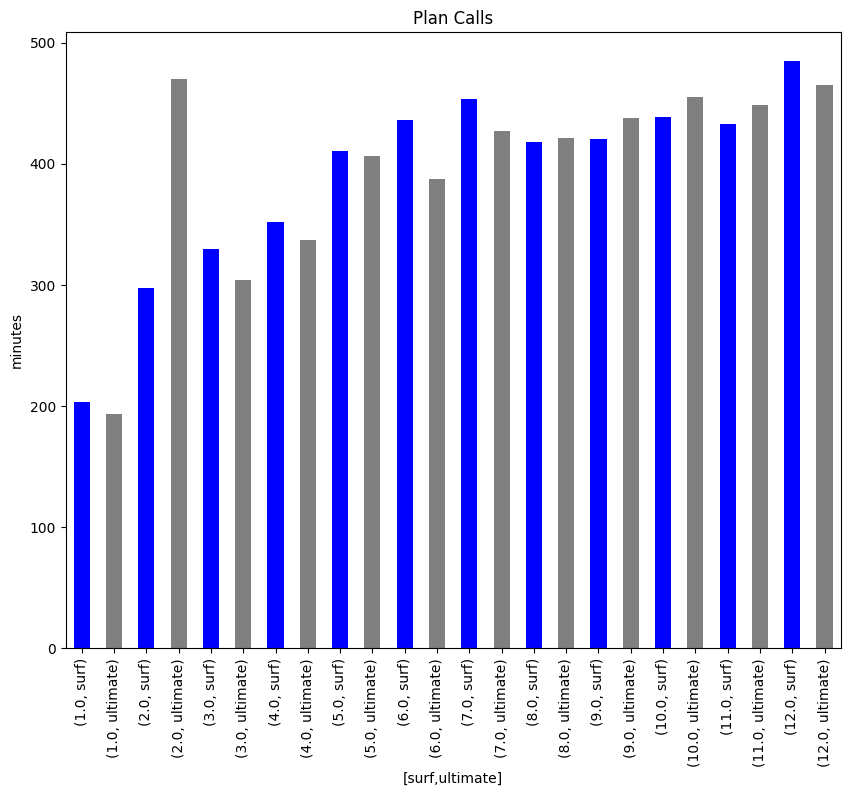

In [ ]:
mean_minutes=data_combination.groupby(['month','plan'])['minutes'].mean()
mean_minutes.plot(kind='bar',figsize=[10,8],xlabel=['surf,ultimate'],title='Plan Calls',color=['blue','gray'],ylabel="minutes")
plt.show()



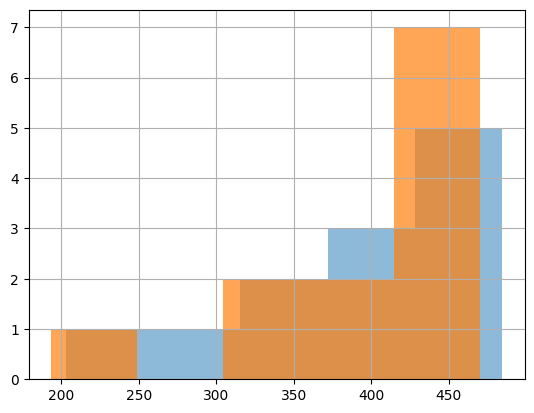

In [ ]:
plan_surf_mean=data_combination.query("plan=='surf'")
plan_surf_minutes=plan_surf_mean.groupby(['month'])['minutes'].mean()
plan_ultimate_mean=data_combination.query("plan=='ultimate'")
plan_ultimate_minutes=plan_ultimate_mean.groupby(['month'])['minutes'].mean()
plan_surf_minutes.hist(bins=5,alpha=0.5)
plan_ultimate_minutes.hist(bins=5,alpha=0.7)

plt.show()





In [ ]:
mean_plan_surf_minutes=data_combination.query("plan=='surf'")
mean_calls_plan_surf=mean_plan_surf_minutes.groupby(['month'])['minutes'].mean()
new_mean_calls_surf=mean_calls_plan_surf.mean()
varianza_calls_surf=np.var(mean_calls_plan_surf)
print(f"La media del plan surf es:{int(new_mean_calls_surf.mean())}")
print(f"La Varianza del plan surf es:{int(varianza_calls_surf)}")

mean_plan_ultimate_minutes=data_combination.query("plan=='ultimate'")
mean_calls_plan_ultimate=mean_plan_ultimate_minutes.groupby(['month'])['minutes'].mean()
new_mean_calls_ultimate=mean_calls_plan_ultimate.mean()
varianza_calls_ultimate=np.var(mean_calls_plan_ultimate)
print(f"La media del plan ultimate es:{int(new_mean_calls_ultimate.mean())}")
print((f"La Varianza del plan ultimate es :{int(varianza_calls_ultimate)}"))



La media del plan surf es:389
La Varianza del plan surf es:5843
La media del plan ultimate es:396
La Varianza del plan ultimate es :6085


<AxesSubplot:xlabel='minutes'>

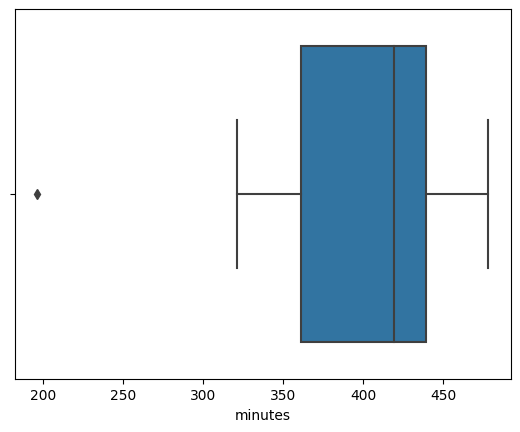

In [ ]:
box_calls_plan=data_combination.groupby(['month'])['minutes'].mean()
sns.boxplot(x=box_calls_plan)


Comentario: Los usuarios van a requerir planes de minimo 320, segun el comportamiento observado, tienen una mediana de 420 y un valor maximo de 500 minutos.

### Mensajes

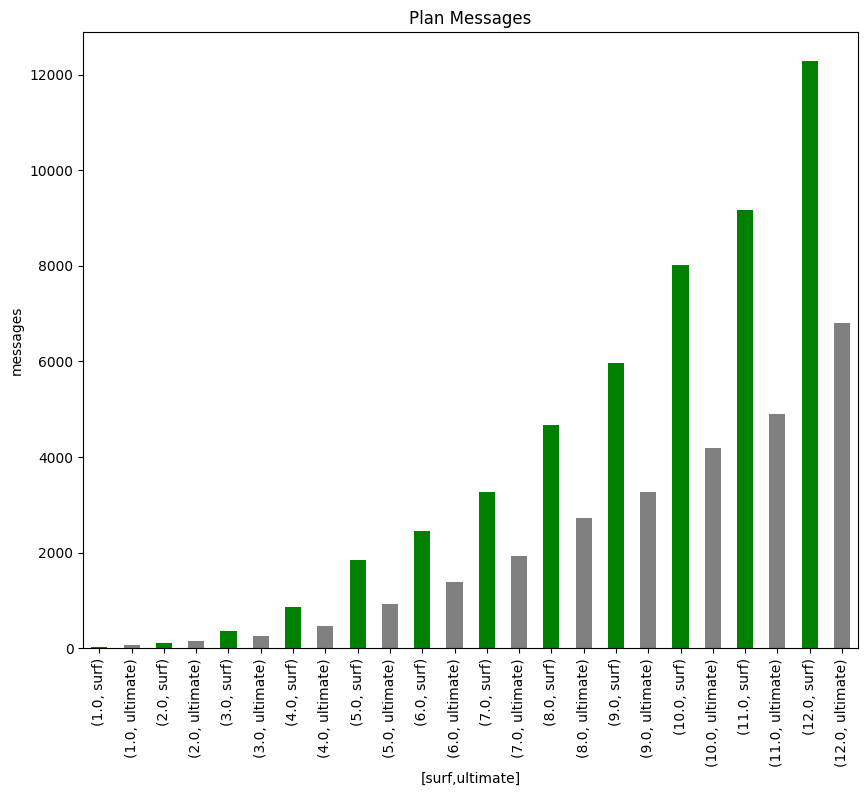

In [ ]:
comparative_data_messagges=data_combination.groupby(['month','plan'])['messages'].sum()
comparative_data_messagges.plot(kind='bar',figsize=[10,8],xlabel=['surf,ultimate'],title='Plan Messages',color=['green','gray'],ylabel="messages")
plt.show()


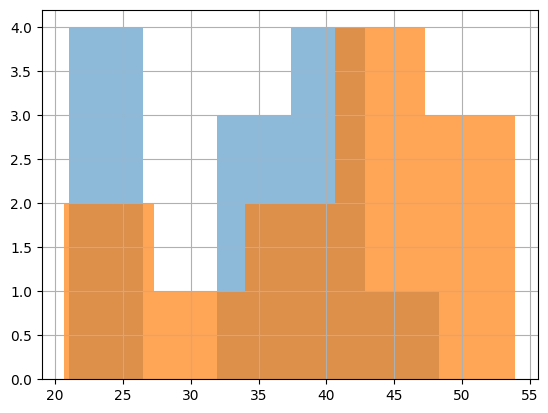

In [ ]:
messages_surf_mean=data_combination.query("plan=='surf'")
plan_surf_messages=messages_surf_mean.groupby(['month'])['messages'].mean()
messages_ultimate_mean=data_combination.query("plan=='ultimate'")
plan_ultimate_messages=messages_ultimate_mean.groupby(['month'])['messages'].mean()
plan_surf_messages.hist(bins=5,alpha=0.5)
plan_ultimate_messages.hist(bins=5,alpha=0.7)

plt.show()

In [ ]:
messages_surf_mean=data_combination.query("plan=='surf'")
plan_surf_messages=messages_surf_mean.groupby(['month'])['messages'].mean()
new_mean_messages_surf=plan_surf_messages.mean()
varianza_messages_surf=np.var(plan_surf_messages)
print(f"La media del plan surf es:{int(new_mean_messages_surf.mean())}")
print(f"La Varianza del plan surf es:{int(varianza_messages_surf)}")

messages_ultimate_mean=data_combination.query("plan=='ultimate'")
plan_ultimate_messages=messages_ultimate_mean.groupby(['month'])['messages'].mean()
new_mean_messages_ultimate=plan_ultimate_messages.mean()
varianza_messages_ultimate=np.var(plan_ultimate_messages)
print(f"La media del plan ultimate es:{int(new_mean_messages_ultimate.mean())}")
print(f"La Varianza del plan ultimate es:{int(varianza_messages_ultimate)}")

La media del plan surf es:33
La Varianza del plan surf es:77
La media del plan ultimate es:39
La Varianza del plan ultimate es:97


<AxesSubplot:xlabel='messages'>

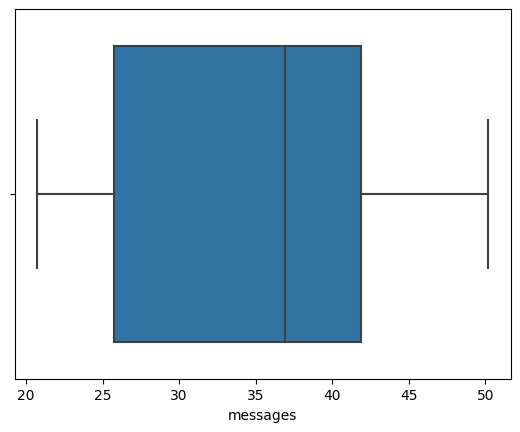

In [ ]:
box_messages_plan=data_combination.groupby(['month'])['messages'].mean()
sns.boxplot(x=box_messages_plan)

Comentario: Los usuarios envian como minimo 21 mensajes, su comportamiento tiene una mediana de 37 y un valor macimo de 50 mensajes.

### Internet

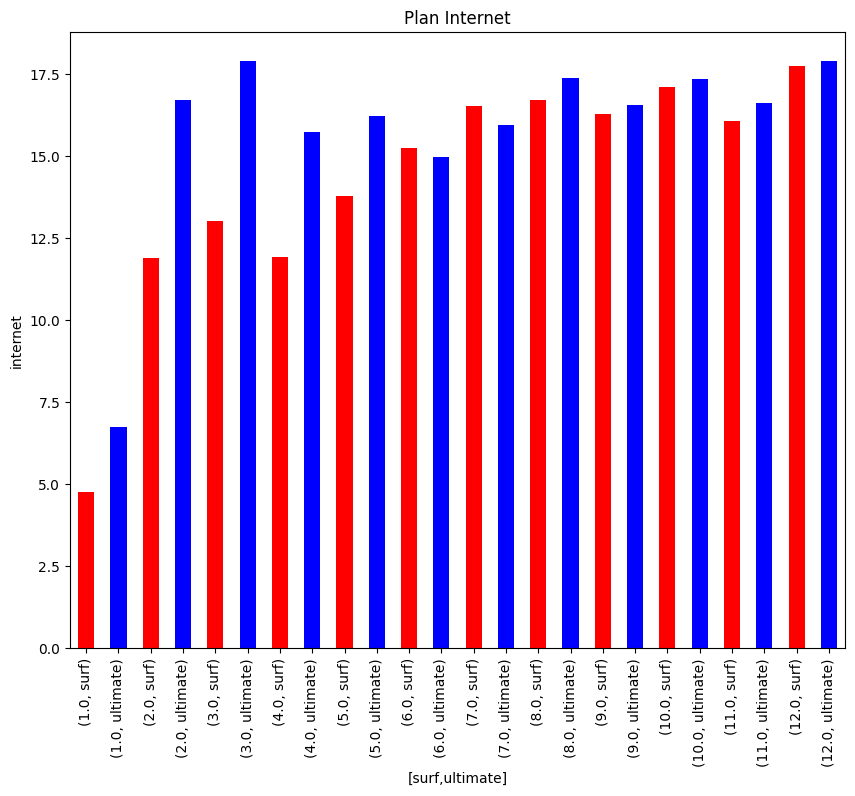

In [ ]:
mean_internet=(data_combination.groupby(['month','plan'])['internet'].mean())/1024
mean_internet.plot(kind='bar',figsize=[10,8],xlabel=['surf,ultimate'],title='Plan Internet',color=['red','blue'],ylabel="internet")
plt.show()


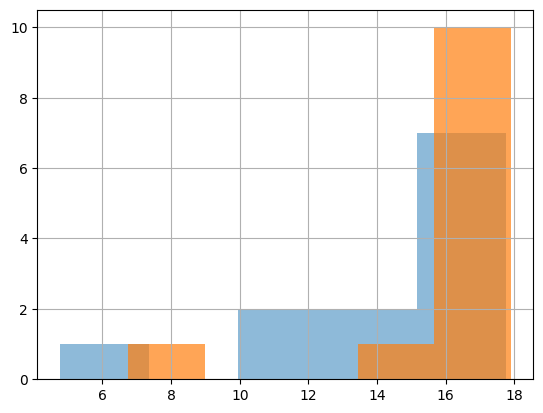

In [ ]:
internet_surf_mean=data_combination.query("plan=='surf'")
plan_surf_internet=(internet_surf_mean.groupby(['month'])['internet'].mean())/1024
internet_ultimate_mean=data_combination.query("plan=='ultimate'")
plan_ultimate_internet=(internet_ultimate_mean.groupby(['month'])['internet'].mean())/1024
plan_surf_internet.hist(bins=5,alpha=0.5)
plan_ultimate_internet.hist(bins=5,alpha=0.7)

plt.show()

In [ ]:
internet_surf_mean=data_combination.query("plan=='surf'")
plan_surf_internet=(internet_surf_mean.groupby(['month'])['internet'].mean())/1024
new_mean_internet_surf=plan_surf_internet.mean()
varianza_internet_surf=np.var(plan_surf_internet)
print(f"La media del plan surf es:{int(new_mean_internet_surf.mean())}")
print (f"La varianza del plan surf es:{int(varianza_internet_surf)}")

internet_ultimate_mean=data_combination.query("plan=='ultimate'")
plan_ultimate_internet=(internet_ultimate_mean.groupby(['month'])['internet'].mean())/1024
new_mean_internet_ultimate=plan_ultimate_internet.mean()
varianza_internet_ultimate=np.var(plan_ultimate_internet)
print(f"La media del plan ultimate es:{int(new_mean_internet_ultimate.mean())}")
print (f"La varianza del plan ultimate es:{int(varianza_internet_ultimate)}")

La media del plan surf es:14
La varianza del plan surf es:11
La media del plan ultimate es:15
La varianza del plan ultimate es:8


<AxesSubplot:xlabel='internet'>

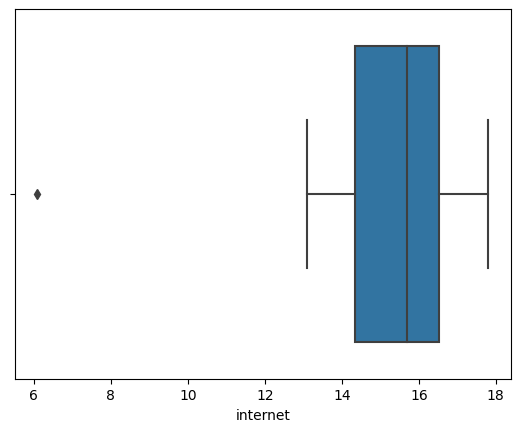

In [ ]:
box_internet_plan=(data_combination.groupby(['month'])['internet'].mean())/1024
sns.boxplot(x=box_internet_plan)

Comentario: Como valor minimo se tienen 13 gigabytes, una mediana de 16 y un valor maximo de 18.

## Ingreso

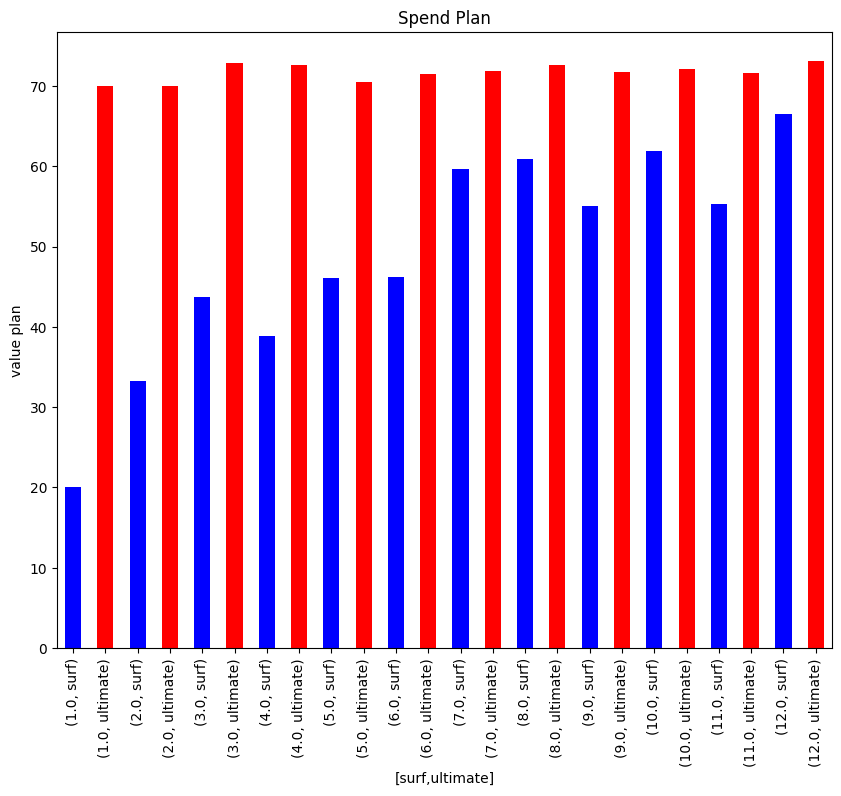

In [ ]:
income_plan_month=calculate_combination.groupby(['month','plan'])['total_income'].mean()
income_plan_month.plot(kind='bar',figsize=[10,8],xlabel=['surf,ultimate'],title='Spend Plan',color=['blue','red'],ylabel="value plan")
plt.show()



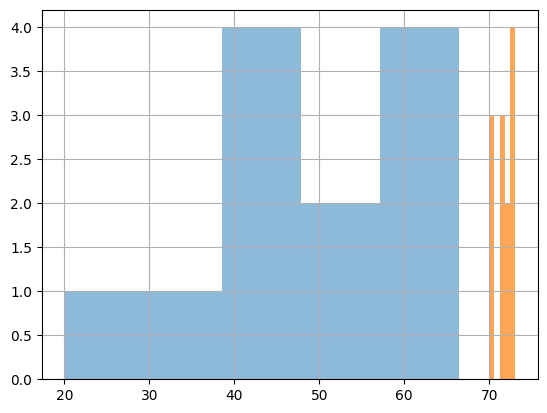

In [ ]:
plan_surf_income=calculate_combination.query("plan=='surf'")
plan_surf_income=plan_surf_income.groupby(['month'])['total_income'].mean()
plan_ultimate_income=calculate_combination.query("plan=='ultimate'")
plan_ultimate_income=plan_ultimate_income.groupby(['month'])['total_income'].mean()
plan_surf_income.hist(bins=5,alpha=0.5)
plan_ultimate_income.hist(bins=5,alpha=0.7)

plt.show()


In [ ]:
income_plan_surf_mean=calculate_combination.query("plan=='surf'")
income_plan_surf_month=(income_plan_surf_mean.groupby(['month'])['total_income'].mean())
new_income_mean_plan_surf=income_plan_surf_month.mean()
varianza_income_plan_surf=np.var(income_plan_surf_month)
print(f"La media de los ingresos plan surf es:{int(new_income_mean_plan_surf.mean())}")
print(f"La varianza de los ingresos plan surf es:{int(varianza_income_plan_surf)}")


income_plan_ultimate_mean=calculate_combination.query("plan=='ultimate'")
income_plan_ultimate_month=(income_plan_ultimate_mean.groupby(['month'])['total_income'].mean())
new_income_mean_plan_ultimate=income_plan_ultimate_month.mean()
varianza_income_plan_ultimate=np.var(income_plan_ultimate_month)
print(f"La media de los ingresos plan ultimate es:{int(new_income_mean_plan_ultimate.mean())}")
print(f"La varianza de los ingresos plan ultimate es:{int(varianza_income_plan_ultimate)}")

   

La media de los ingresos plan surf es:48
La varianza de los ingresos plan surf es:169
La media de los ingresos plan ultimate es:71
La varianza de los ingresos plan ultimate es:1


<AxesSubplot:xlabel='total_income'>

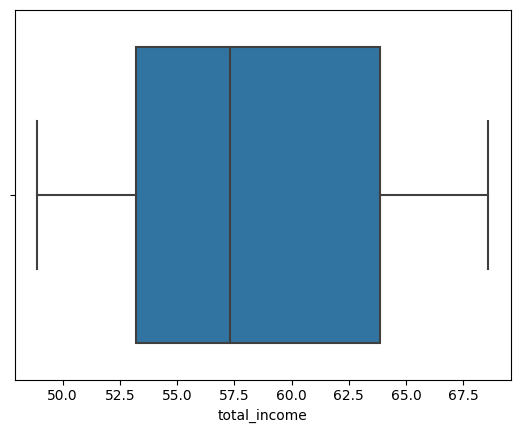

In [ ]:
box_income_plan=(calculate_combination.groupby(['month'])['total_income'].mean())
sns.boxplot(x=box_income_plan)

Comentario: Elingreso para el plan Ultimate es el valor pagado en el plan 70 dolares mientras que para surf si varia entre 48 y 70 dolares

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

In [ ]:
users_ingreso_mean=calculate_combination.merge(data_users,on='user_id')
users_ingreso_surf=users_ingreso_mean.query("plan_x=='surf'")
Q1_surf=users_ingreso_surf['total_income'].quantile(0.25)
Q3_surf=users_ingreso_surf['total_income'].quantile(0.75)
IQR_surf=Q3_surf-Q1_surf
limite_inferior_surf=Q1_surf-1.5*IQR_surf
limite_superior_surf=Q3_surf+1.5*IQR_surf
users_ingreso_surf=users_ingreso_surf[(users_ingreso_surf['total_income']>=limite_inferior_surf)&(users_ingreso_surf['total_income']<=limite_superior_surf)]
hipotesis_surf=users_ingreso_surf.groupby(['user_id'])['total_income'].mean()


users_ingreso_ultimate=users_ingreso_mean.query("plan_x=='ultimate'")
Q1_ultimate=users_ingreso_ultimate['total_income'].quantile(0.25)
Q3_ultimate=users_ingreso_ultimate['total_income'].quantile(0.75)
IQR_ultimate=Q3_ultimate-Q1_ultimate
limite_inferior_ultimate=Q1_ultimate-1.5*IQR_ultimate
limite_superior_ultimate=Q3_ultimate+1.5*IQR_ultimate
hipotesis_ultimate=users_ingreso_ultimate.groupby(['user_id'])['total_income'].mean()

alpha=0.05


result=st.ttest_ind(hipotesis_surf,hipotesis_ultimate,equal_var=False)
print('valor p:',result.pvalue)

if (result.pvalue<alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

valor p: 2.890915781226585e-43
Rechazamos la hipótesis nula


[Probar la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [ ]:
users_ingreso_mean=calculate_combination.merge(data_users,on='user_id')
users_ingreso_ny=users_ingreso_mean.query("city=='New York-Newark-Jersey City, NY-NJ-PA MSA'")
Q1_ny=users_ingreso_ny['total_income'].quantile(0.25)
Q3_ny=users_ingreso_ny['total_income'].quantile(0.75)
IQR_ny=Q3_ny-Q1_ny
limite_inferior_ny=Q1_ny-1.5*IQR_ny
limite_superior_ny=Q3_ny+1.5*IQR_ny
users_ingreso_ny=users_ingreso_ny[(users_ingreso_ny['total_income']>=limite_inferior_ny)&(users_ingreso_ny['total_income']<=limite_superior_ny)]
hipotesis_ny=users_ingreso_ny.groupby(['user_id'])['total_income'].mean()
users_ingreso_other=users_ingreso_mean.query("city!='New York-Newark-Jersey City, NY-NJ-PA MSA'")
Q1_other=users_ingreso_other['total_income'].quantile(0.25)
Q3_other=users_ingreso_other['total_income'].quantile(0.75)
IQR_other=Q3_other-Q1_other
limite_inferior_other=Q1_other-1.5*IQR_other
limite_superior_other=Q3_other+1.5*IQR_other
hipotesis_other=users_ingreso_other.groupby(['user_id'])['total_income'].mean()

alpha=0.05


result_city=st.ttest_ind(hipotesis_ny,hipotesis_other,equal_var=False)
print('valor p:',result_city.pvalue)

if (result_city.pvalue<alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


valor p: 0.003847234247984977
Rechazamos la hipótesis nula


## Conclusión general


Conclusiones=
*los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son muy similares motivo por lo cual se rechaza la hipotesis en nuestro analisis.
*El ingreso promedio de los usuarios del área NY-NJ es similar al de los usuarios de otras regiones, debido a que en el analisis de hipotesis como resultado se obtiene que se debe rechazar la hipotesis nula
*Definitivamente este tipo de analisis permite que las empresas toemn decisiones importantes que pueden incrementar sus ingresos ofreciendo los planes que los clientes necesitan.